In [1]:
# carregando sistema físico
from m3l.structure import System as sys
import json
#
system = sys()
system.loadSystem('system_Ar_opt.json')
system.convertUnits()
system.save('system_au.json')
#system.convertUnitsInv()
#system.atoms
#system.cell

In [2]:
# definindo o modelo de interação entre os átomos (campo de força)
from m3l.molecular_dynamics import ForceField
class Forces(ForceField):
    def __init__(self):
        super().__init__()
        self.parameters((0.250/self.ECONV, 3.345/self.ACONV, 10.0/self.ACONV))

model = Forces()
model()

array([3.98576808e-04, 6.32113389e+00, 1.88972612e+01])

In [3]:
# Definindo método de otimização
from m3l.optimize import Optimize as optim
#
opt = optim(model(), learning_rate = 1.e-4)

In [4]:
# executando looping
import time
import csv
#
n_steps = 100000
start = time.time()
with open('optimize.csv', 'w', newline = '') as csvfile:
    fieldnames = ['step', 'energy']
    writer = csv.DictWriter(csvfile, fieldnames = fieldnames)
    writer.writeheader()
    for step in range(1, n_steps+1):
        system = opt.SD(system)
        writer.writerow({
            'step': step,
            'energy': system.epotential*system.ECONV})
#
end = time.time()
print(f'Elapsed time: {end - start}')

Elapsed time: 309.24352741241455


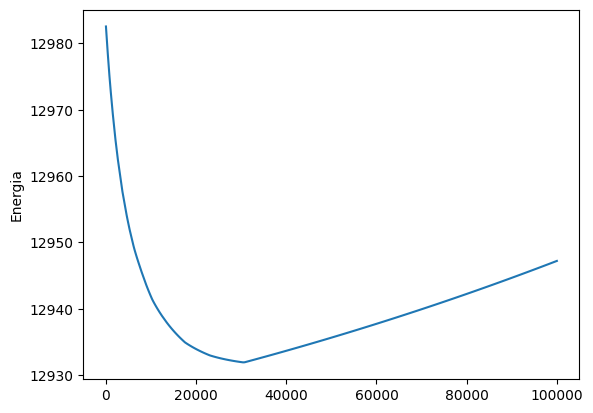

In [5]:
import matplotlib.pyplot as plt
import numpy as np
dataset = np.loadtxt("optimize.csv", dtype=np.float32, delimiter = ",", skiprows=1)
x_list = [item[0].item() for item in dataset]
y_list = [item[1].item() for item in dataset]
plt.plot(x_list, y_list)
plt.ylabel('Energia')
#plt.ylim(0,1e28)
plt.show()

In [6]:
system.convertUnitsInv()
system.save('system_new.json')